# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Exercise 02.1

The goal of this exercise is to compute the integral $I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$ via Monte Carlo tecnique by using both uniform and *importance sampling*.

#### (1) Sampling a uniform distribution in [0,1]

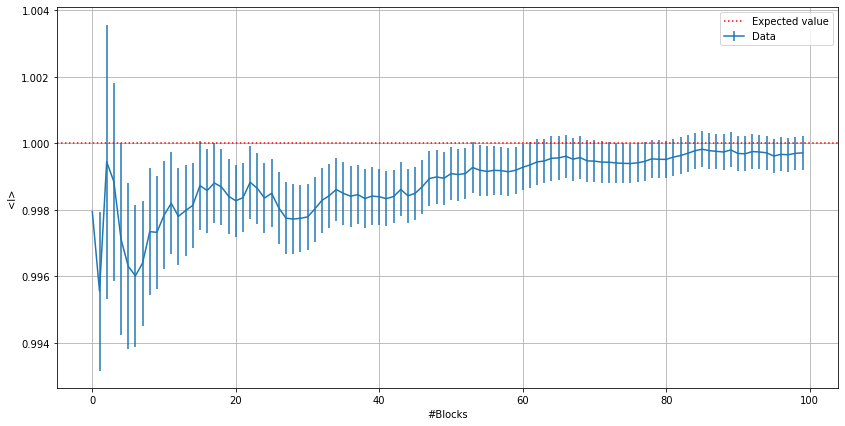

In [17]:
N = 100 # Number of blocks
prog_average = np.loadtxt("../results/EX02_1(1).dat", usecols=0)
prog_error = np.loadtxt("../results/EX02_1(1).dat", usecols=1)
x=np.arange(0,N) 

plt.figure(figsize=(14,7))
plt.axhline(y=1, color='r', linestyle="dotted", label = "Expected value")
plt.errorbar(x, prog_average, yerr=prog_error, label = "Data")
plt.xlabel('#Blocks')
plt.ylabel('<I>')
plt.grid(True)
plt.legend()
plt.show()

#### (2) Using Importance Sampling

To use importance sampling I've choosed a pdf similar to my integrand $f(x)$ on $[0,1]$ to estimate $I$ obtaining:
$$
I = \int_0^1 \frac{f(x)}{w(x)}w(x) dx = <\frac{f(x)}{w(x)}>_{w(x)} .
$$
Choosing $ w(x) = 2(1-x) $ we can see that the two function are similar on the interval of interest:

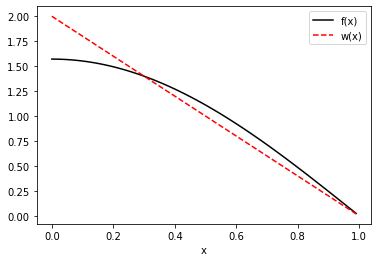

In [21]:
t2 = np.arange(0.0, 1.0, 0.01)

plt.plot(t2, (np.pi/2)*np.cos(np.pi/2*t2), 'k', label='f(x)')
plt.plot(t2, 2*(1-t2), 'r--', label='w(x)')
plt.legend(loc="upper right")
plt.xlabel('x')

plt.show()

In this way I get:
$$
I \approx \frac{1}{N}\sum_{i=0}^N \frac{f(x_i)}{w(x_i)} = \frac{1}{N}\sum_{i=0}^N \frac{\pi}{4}\frac{\cos(\pi x/2)}{(1-x)},
$$
where $x_i$ are random variables drawn from the distribution $w(x)$.
To get each $x_i$, I've sampled a random number $y_i$ from a uniform distribution over $[0,1]$ and computed the value of $x_i$ from the inverse of the cumulative distribution of $w(x)$:

$$
x_i = F_{w(x)}^{-1}(y_i) = 1 - \sqrt{1-y_i}
$$

Results are shown below.

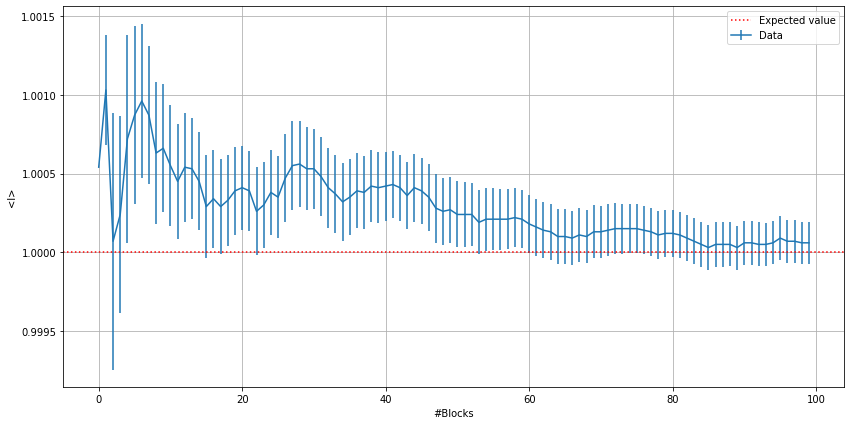

In [23]:
prog_average = np.loadtxt("../results/EX02_1(2).dat", usecols=0)
prog_error = np.loadtxt("../results/EX02_1(2).dat", usecols=1)

plt.figure(figsize=(14,7))
plt.axhline(y=1, color='r', linestyle="dotted", label = "Expected value")
plt.errorbar(x, prog_average , yerr=prog_error, label = "Data")
plt.xlabel('#Blocks')
plt.ylabel('<I>')
plt.grid(True)
plt.legend()
plt.show()

As expected the resusult obtained using importance sampling technique is in a better agreement with the exact result than the one obtained with uniform sampling.

### Exercise 02.2

For this exercise I had to produce two pictures of the mean distance from the origin of two walkers which live respectiveley on a cubic lattice and in the continuum, obtained repeating $10^4$ times the simulation.
Both walkers have unitary step lenght.
The picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs, with their statistical uncertainties, as function of the step $i\in [0,10^2]$ is shown below.

It's also shown the fit with $f(N)=k\sqrt{N}$ to see if the walkers approach a diffusive behavior as N increases.

In [37]:
from scipy import optimize

def test_func(x, k):
    return k * np.sqrt(x)

#### (1) Random Walk on a cubic lattice

k of the fit =  0.9289544536449553


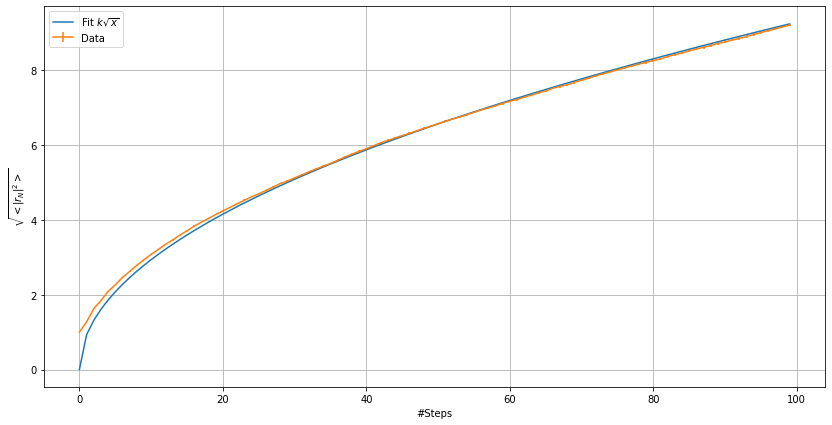

In [35]:
prog_distance = np.loadtxt("../results/EX02_2(1).dat", usecols=0)
distance_error = np.loadtxt("../results/EX02_2(1).dat", usecols=1)
N = prog_distance.size # Number of steps
steps_number = np.arange(0,N)

params, params_covariance = optimize.curve_fit(test_func, steps_number, prog_distance)
print("k of the fit = ", params[0])

plt.figure(figsize=(14,7))

plt.plot(steps_number, test_func(steps_number, params), label="Fit $k\sqrt{x}$")
plt.errorbar(steps_number, prog_distance, yerr=distance_error, label="Data")
plt.legend(loc="upper left")

plt.xlabel('#Steps')
plt.ylabel("$\sqrt{<|{r}_N|^2 >}$")
plt.grid(True)
plt.show()

#### (2) Random Walk in the continuum

k of the fit =  0.9234187854280124


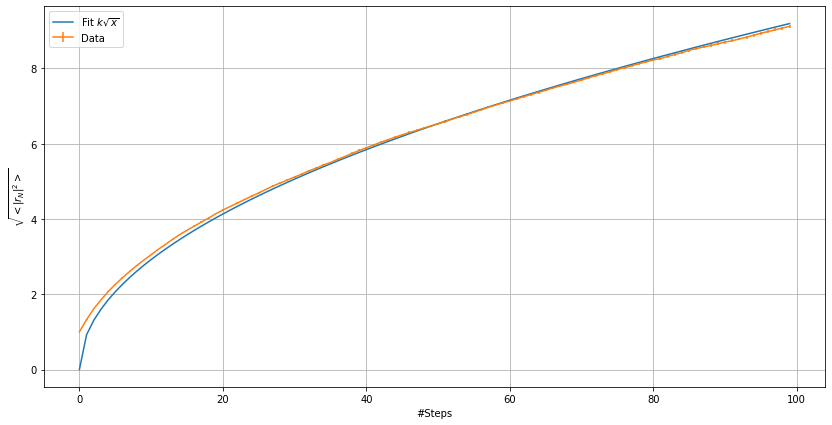

In [33]:
prog_distance = np.loadtxt("../results/EX02_2(2).dat", usecols=0)
distance_error = np.loadtxt("../results/EX02_2(2).dat", usecols=1)
N = prog_distance.size # Number of steps
steps_number = np.arange(0,N)

params, params_covariance = optimize.curve_fit(test_func, steps_number, prog_distance)
print("k of the fit = ", params[0])

plt.figure(figsize=(14,7))
plt.plot(steps_number, test_func(steps_number, params), label="Fit $k\sqrt{x}$")
plt.errorbar(steps_number, prog_distance, yerr=distance_error, label="Data")
plt.legend(loc="upper left")

plt.xlabel('#Steps')
plt.ylabel("$\sqrt{<|{r}_N|^2 >}$")
plt.grid(True)
plt.show()

From both graphs we can see that the RW follow a diffusive behavior as its $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ could be fitted by a function like $f(N)=k\sqrt{N}$, with $k=0.93 $ for the discrete RW and $k=0.92$ for the continuus RW.